<a href="https://colab.research.google.com/github/jasradubais15-lang/my-project/blob/main/Copy_of_FAKE_NEWS_DETECTIONipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload() # Upload Fake.csv and True.csv

Saving True.csv to True.csv
Saving Fake.csv to Fake.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")



In [ ]:
fake['label'] = 'FAKE'
true['label'] = 'REAL'

In [ ]:
data = pd.concat([fake, true], ignore_index=True)
print("Dataset shape:", data.shape)
print(data['label'].value_counts())

Dataset shape: (44898, 5)
label
FAKE    23481
REAL    21417
Name: count, dtype: int64


In [ ]:
data = data[['text', 'label']]
data = data.dropna() # remove missing values
print("After dropping missing values:", data.shape)

After dropping missing values: (44898, 2)


In [ ]:
X = data['text']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)

In [ ]:
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.9327394209354121

Classification Report:
               precision    recall  f1-score   support

        FAKE       0.93      0.94      0.94      4733
        REAL       0.93      0.92      0.93      4247

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



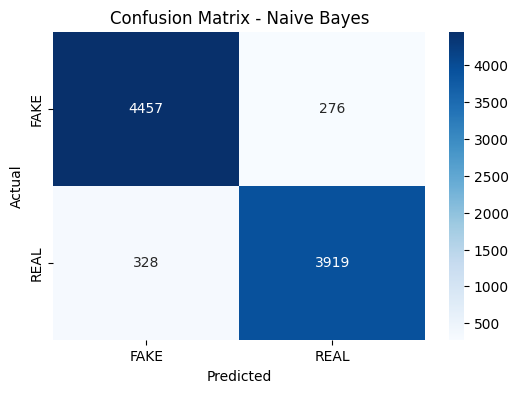

In [ ]:
cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE','REAL'], yticklabels=['FAKE','REAL'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

In [ ]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)
y_pred_lr = lr_model.predict(X_test_tfidf)

In [ ]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9846325167037862

Classification Report:
               precision    recall  f1-score   support

        FAKE       0.99      0.98      0.99      4733
        REAL       0.98      0.99      0.98      4247

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



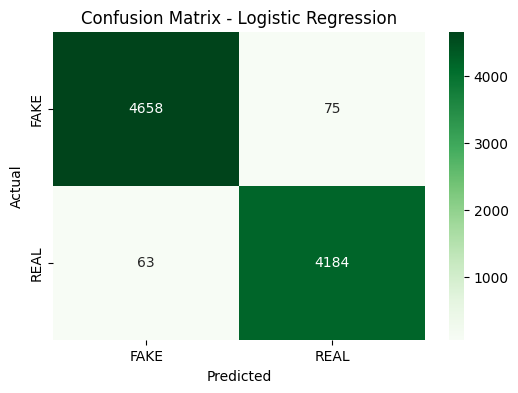

In [ ]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens', xticklabels=['FAKE','REAL'], yticklabels=['FAKE','REAL'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [ ]:
sample_text = ["As U.S. budget fight looms, Republicans flip their fiscal script."]
sample_tfidf = tfidf.transform(sample_text)
prediction = lr_model.predict(sample_tfidf)
print("Prediction for sample text:", prediction[0])

Prediction for sample text: FAKE


In [ ]:
# Test with a new article
sample_text = ["The government has announced a new policy to support startups, aiming to provide financial aid, training programs, and infrastructure support to small businesses across the country in 2025."]
sample_tfidf = tfidf.transform(sample_text)
prediction = lr_model.predict(sample_tfidf)
print("Prediction for sample text:", prediction[0])


Prediction for sample text: REAL


In [ ]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)
y_pred_svm = svm_model.predict(X_test_tfidf)

In [ ]:
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9944320712694877

Classification Report:
               precision    recall  f1-score   support

        FAKE       0.99      0.99      0.99      4733
        REAL       0.99      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



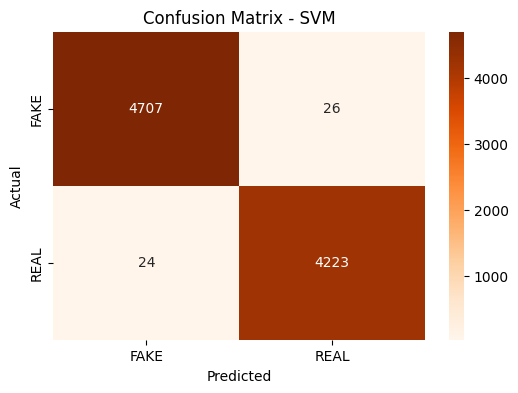

In [ ]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6,4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges', xticklabels=['FAKE','REAL'], yticklabels=['FAKE','REAL'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

In [ ]:
sample_text = ["Scientists discovered water on Mars. This discovery will help humanity explore new planets and understand the possibility of life beyond Earth."]

sample_tfidf = tfidf.transform(sample_text)
prediction_svm = svm_model.predict(sample_tfidf)
print("SVM Prediction for sample text:", prediction_svm[0])


SVM Prediction for sample text: FAKE


In [ ]:
sample_texts = [
    "Government announces new policy to support startups in 2025.",
    "Mercury dips to 12.7°C in Delhi, season’s lowest; AQI ‘poor’ at 278.",
    "Board of Control for Cricket in India (BCCI) announced ₹51 crore prize for the women's team.",
    "Elections results delayed due to technical issues in voting machines.",
    "ASI to launch ₹2.4-crore project to revive Zafar Mahal’s water tank."
]

# Transform using TF-IDF
sample_tfidf = tfidf.transform(sample_texts)

# Predict using SVM
predictions_svm = svm_model.predict(sample_tfidf)

# Predict using Logistic Regression
predictions_lr = lr_model.predict(sample_tfidf)

# Predict using Naive Bayes
predictions_nb = nb_model.predict(sample_tfidf)

# Print results
for text, nb, lr, svm in zip(sample_texts, predictions_nb, predictions_lr, predictions_svm):
    print(f"News: {text}")
    print(f"Naive Bayes Prediction: {nb}")
    print(f"Logistic Regression Prediction: {lr}")
    print(f"SVM Prediction: {svm}")
    print("-"*70)


News: Government announces new policy to support startups in 2025.
Naive Bayes Prediction: REAL
Logistic Regression Prediction: FAKE
SVM Prediction: FAKE
----------------------------------------------------------------------
News: Mercury dips to 12.7°C in Delhi, season’s lowest; AQI ‘poor’ at 278.
Naive Bayes Prediction: REAL
Logistic Regression Prediction: FAKE
SVM Prediction: FAKE
----------------------------------------------------------------------
News: Board of Control for Cricket in India (BCCI) announced ₹51 crore prize for the women's team.
Naive Bayes Prediction: REAL
Logistic Regression Prediction: FAKE
SVM Prediction: FAKE
----------------------------------------------------------------------
News: Elections results delayed due to technical issues in voting machines.
Naive Bayes Prediction: REAL
Logistic Regression Prediction: FAKE
SVM Prediction: FAKE
----------------------------------------------------------------------
News: ASI to launch ₹2.4-crore project to revive Za

In [ ]:
sample_text = ["India wins the ICC Women’s World Cup 2025! The team celebrated their historic victory with fans across the country."]
sample_tfidf = tfidf.transform(sample_text)

# Predict with all models
prediction_nb = nb_model.predict(sample_tfidf)
prediction_lr = lr_model.predict(sample_tfidf)
prediction_svm = svm_model.predict(sample_tfidf)

print("Naive Bayes Prediction:", prediction_nb[0])
print("Logistic Regression Prediction:", prediction_lr[0])
print("SVM Prediction:", prediction_svm[0])


Naive Bayes Prediction: REAL
Logistic Regression Prediction: FAKE
SVM Prediction: FAKE


In [ ]:
# Step: Test new sports-related news
sample_text = ["Board of Control for Cricket in India (BCCI) அணிக்கு ரெக்கார்டு ரகமாக ₹51 கோார் பரிசு அறிவித்துள்ளது"]

# Transform using TF-IDF
sample_tfidf = tfidf.transform(sample_text)

# Predict using Naive Bayes
prediction_nb = nb_model.predict(sample_tfidf)

# Predict using Logistic Regression
prediction_lr = lr_model.predict(sample_tfidf)

# Predict using SVM
prediction_svm = svm_model.predict(sample_tfidf)

# Print results
print("Naive Bayes Prediction:", prediction_nb[0])
print("Logistic Regression Prediction:", prediction_lr[0])
print("SVM Prediction:", prediction_svm[0])


Naive Bayes Prediction: REAL
Logistic Regression Prediction: FAKE
SVM Prediction: FAKE


In [ ]:
sample_text=["OpenAI has announced a free 12-month ChatGPT Go subscription for users in India, starting November 4, 2025.."]
sample_tfidf = tfidf.transform(sample_text)

# Predict using Naive Bayes
prediction_nb = nb_model.predict(sample_tfidf)
print("Naive Bayes Prediction:", prediction_nb[0])


Naive Bayes Prediction: REAL


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_tfidf, y_train)
y_pred_dt = dt_model.predict(X_test_tfidf)

In [ ]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.994097995545657

Classification Report:
               precision    recall  f1-score   support

        FAKE       1.00      0.99      0.99      4733
        REAL       0.99      1.00      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



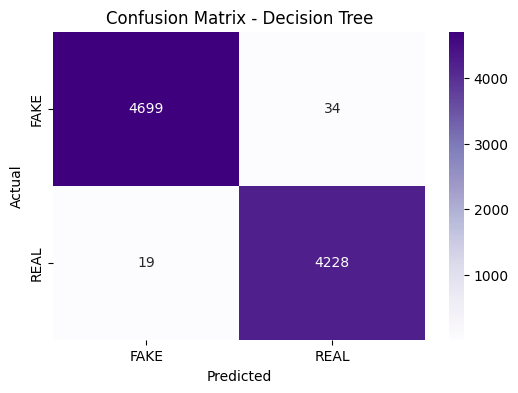

In [ ]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Purples', xticklabels=['FAKE','REAL'], yticklabels=['FAKE','REAL'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [ ]:
sample_text = ["OpenAI has announced a free 12-month ChatGPT Go subscription for users in India, starting November 4, 2025."]
sample_tfidf = tfidf.transform(sample_text)
prediction_dt = dt_model.predict(sample_tfidf)
print("Decision Tree Prediction for sample text:", prediction_dt[0])

Decision Tree Prediction for sample text: FAKE


In [ ]:
sample_text = ["ChatGPT Go subscription now free for 12 months in India: Complete guide on features and how to get the deal."]

In [ ]:
sample_tfidf = tfidf.transform(sample_text)

In [ ]:
prediction_nb = nb_model.predict(sample_tfidf)
prediction_lr = lr_model.predict(sample_tfidf)
prediction_svm = svm_model.predict(sample_tfidf)
prediction_dt = dt_model.predict(sample_tfidf)

In [ ]:
print("Naive Bayes Prediction:", prediction_nb[0])
print("Logistic Regression Prediction:", prediction_lr[0])
print("SVM Prediction:", prediction_svm[0])
print("Decision Tree Prediction:", prediction_dt[0])

Naive Bayes Prediction: FAKE
Logistic Regression Prediction: FAKE
SVM Prediction: FAKE
Decision Tree Prediction: FAKE


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [ ]:
fake['label'] = 'FAKE'
true['label'] = 'REAL'

In [ ]:
data = pd.concat([fake, true], ignore_index=True)
print("Dataset shape:", data.shape)
print(data['label'].value_counts())

Dataset shape: (44898, 5)
label
FAKE    23481
REAL    21417
Name: count, dtype: int64


In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = str(text).lower() # lowercase
    text = re.sub(r'\W', ' ', text) # remove punctuation/special chars
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

In [ ]:
data['text'] = data['text'].apply(preprocess)
data = data[['text', 'label']]
data = data.dropna()
print("After preprocessing and dropping missing values:", data.shape)

After preprocessing and dropping missing values: (44898, 2)



Naive Bayes Accuracy: 0.9327394209354121
Naive Bayes Classification Report:
               precision    recall  f1-score   support

        FAKE       0.93      0.94      0.94      4733
        REAL       0.93      0.92      0.93      4247

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



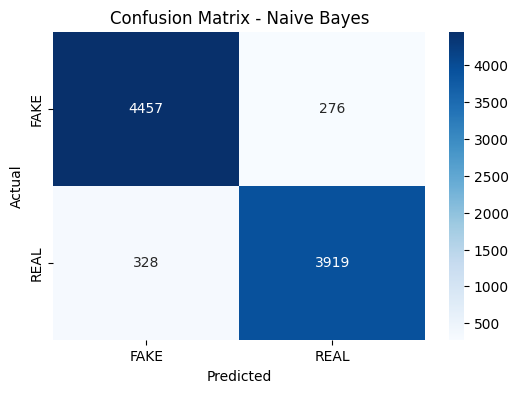


Logistic Regression Accuracy: 0.9846325167037862
Logistic Regression Classification Report:
               precision    recall  f1-score   support

        FAKE       0.99      0.98      0.99      4733
        REAL       0.98      0.99      0.98      4247

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



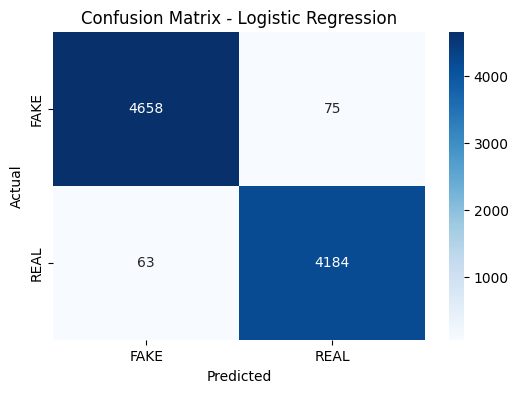


SVM Accuracy: 0.9944320712694877
SVM Classification Report:
               precision    recall  f1-score   support

        FAKE       0.99      0.99      0.99      4733
        REAL       0.99      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



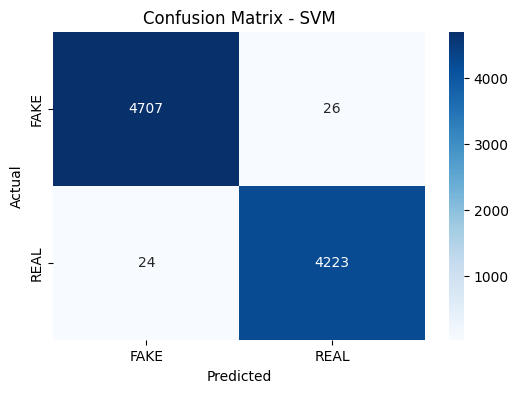


Decision Tree Accuracy: 0.994097995545657
Decision Tree Classification Report:
               precision    recall  f1-score   support

        FAKE       1.00      0.99      0.99      4733
        REAL       0.99      1.00      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



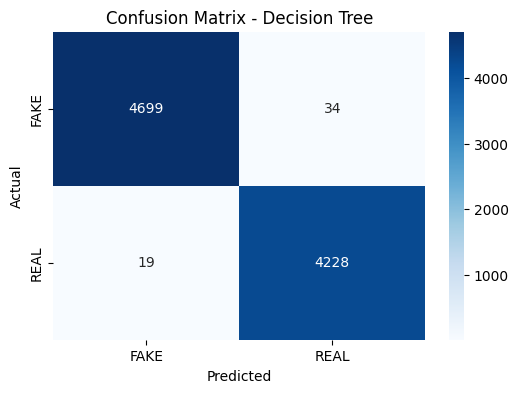

In [ ]:
models = {'Naive Bayes': nb_model, 'Logistic Regression': lr_model, 'SVM': svm_model, 'Decision Tree': dt_model}

for name, model in models.items():
    y_pred = model.predict(X_test_tfidf)
    print(f"\n{name} Accuracy:", accuracy_score(y_test, y_pred))
    print(f"{name} Classification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE','REAL'], yticklabels=['FAKE','REAL'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

In [ ]:
def predict_news(text):
    preprocessed_text = preprocess(text)
    tfidf_text = tfidf.transform([preprocessed_text])
    print("\nPredictions for the news article:")
    print("Naive Bayes Prediction:", nb_model.predict(tfidf_text)[0])
    print("Logistic Regression Prediction:", lr_model.predict(tfidf_text)[0])
    print("SVM Prediction:", svm_model.predict(tfidf_text)[0])
    print("Decision Tree Prediction:", dt_model.predict(tfidf_text)[0])

In [ ]:
news_list = [
"OpenAI has announced a free 12-month ChatGPT Go subscription for users in India, starting November 4, 2025.",
"Board of Control for Cricket in India (BCCI) announced ₹51 crore prize for the women's team.",
"Gold prices hold steady, hover near Rs 1.21 lakh resistance. Expert-approved trade setup inside.",
"Southern Railway Announces Special Trains from Chennai to Kollam for Sabarimala Pilgrimage.",
"Government announces new policy to support startups in 2025."
]

In [ ]:
results = []

for news in news_list:
    preprocessed_text = preprocess(news)
    tfidf_text = tfidf.transform([preprocessed_text])
    result = {
        "News": news,
        "Naive Bayes": nb_model.predict(tfidf_text)[0],
        "Logistic Regression": lr_model.predict(tfidf_text)[0],
        "SVM": svm_model.predict(tfidf_text)[0],
        "Decision Tree": dt_model.predict(tfidf_text)[0]
    }
    results.append(result)

In [ ]:
results_df = pd.DataFrame(results)
results_df

,News,Naive Bayes,Logistic Regression,SVM,Decision Tree
0,OpenAI has announced a free 12-month ChatGPT G...,REAL,FAKE,FAKE,FAKE
1,Board of Control for Cricket in India (BCCI) a...,REAL,FAKE,FAKE,FAKE
2,"Gold prices hold steady, hover near Rs 1.21 la...",REAL,FAKE,FAKE,FAKE
3,Southern Railway Announces Special Trains from...,REAL,FAKE,FAKE,FAKE
4,Government announces new policy to support sta...,REAL,FAKE,FAKE,FAKE


/tmp/ipython-input-777950482.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="viridis")


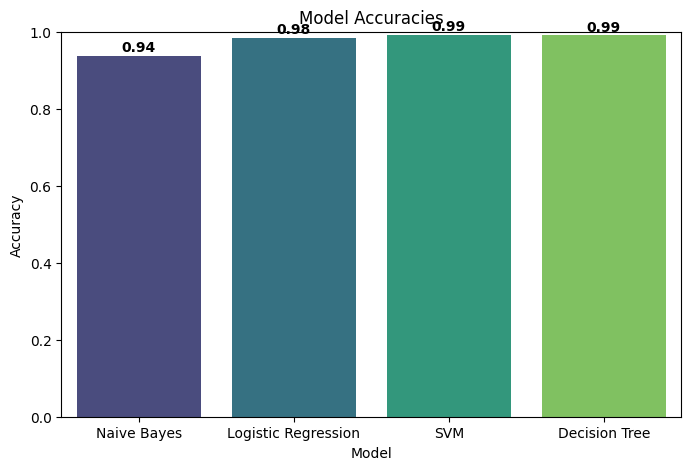

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="viridis")
plt.ylim(0, 1)
plt.title("Model Accuracies")
plt.ylabel("Accuracy")
plt.xlabel("Model")
for i, v in enumerate(model_accuracies.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()

In [ ]:
# Split data after preprocessing
X_train_processed, X_test_processed, y_train_processed, y_test_processed = train_test_split(
    data['text'], data['label'], test_size=0.2, random_state=42
)

# Re-vectorize the preprocessed text data
tfidf_processed = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf_processed = tfidf_processed.fit_transform(X_train_processed)
X_test_tfidf_processed = tfidf_processed.transform(X_test_processed)

# Retrain models with preprocessed and re-vectorized data
nb_model_processed = MultinomialNB()
nb_model_processed.fit(X_train_tfidf_processed, y_train_processed)

lr_model_processed = LogisticRegression(max_iter=1000)
lr_model_processed.fit(X_train_tfidf_processed, y_train_processed)

svm_model_processed = LinearSVC()
svm_model_processed.fit(X_train_tfidf_processed, y_train_processed)

dt_model_processed = DecisionTreeClassifier(random_state=42)
dt_model_processed.fit(X_train_tfidf_processed, y_train_processed)

# Evaluate models and store accuracies
model_accuracies = {}

models_processed = {
    'Naive Bayes': nb_model_processed,
    'Logistic Regression': lr_model_processed,
    'SVM': svm_model_processed,
    'Decision Tree': dt_model_processed
}

for name, model in models_processed.items():
    y_pred = model.predict(X_test_tfidf_processed)
    acc = accuracy_score(y_test_processed, y_pred)
    model_accuracies[name] = acc

print("Model Accuracies after preprocessing:")
for name, acc in model_accuracies.items():
    print(f"{name}: {acc:.4f}")

Model Accuracies after preprocessing:
Naive Bayes: 0.9379
Logistic Regression: 0.9845
SVM: 0.9925
Decision Tree: 0.9918


In [ ]:
pred_plot_df = results_df.melt(id_vars=['News'], var_name='Model', value_name='Prediction')

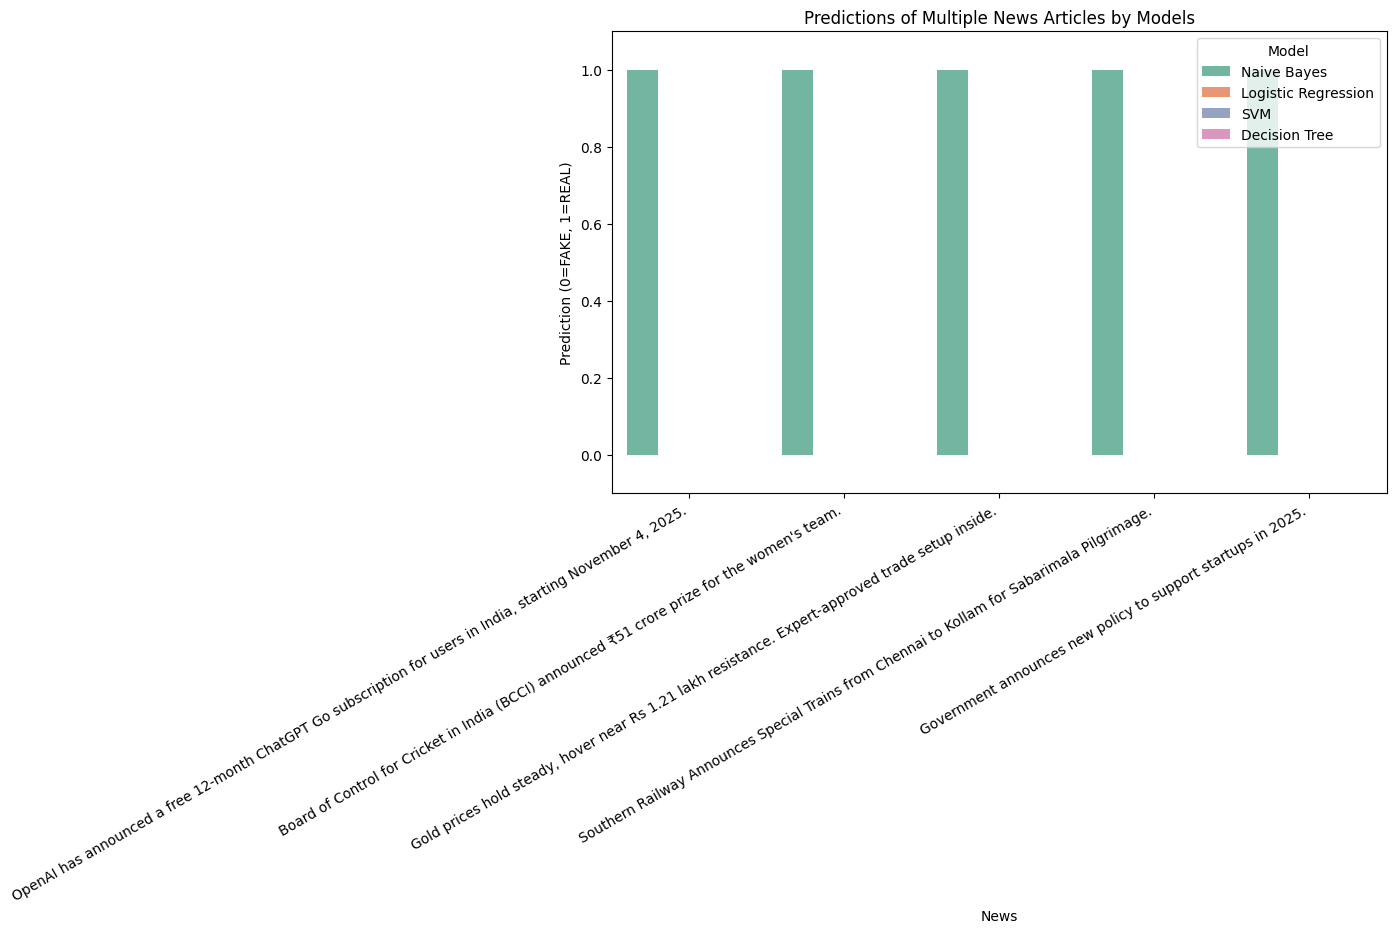

In [ ]:
pred_plot_df['Prediction_Num'] = pred_plot_df['Prediction'].map({'FAKE': 0, 'REAL': 1})

plt.figure(figsize=(10,6))
sns.barplot(data=pred_plot_df, x='News', y='Prediction_Num', hue='Model', palette='Set2')
plt.ylim(-0.1, 1.1)
plt.ylabel("Prediction (0=FAKE, 1=REAL)")
plt.xticks(rotation=30, ha='right')
plt.title("Predictions of Multiple News Articles by Models")
plt.legend(title='Model')
plt.show()